# Pymaceuticals Inc.
---

### Analysis

- In this analysis, Capomulin had the most number of observed mouse timepoints and proporiva had the least

- Within Capomulin, Ramicane, Infubinol, Ceftamin, mice that took Infubinol treatment had the most tumor volumn compared to the rest

- It appears that Capimulin treatment showed a decrease in tumor volumn over time in Mouse ID l509

- There is a strong coorelation (0.84) between mouse weight and the average tumor volume. The r-suquared (0.71) indicate that the tumor volumn can be affected by weight.
 

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [110]:
# Checking the number of mice.
mice_number = len(combined_data["Mouse ID"].unique())
mice_number

249

In [111]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False)]
# duplicate_mice
duplicate_mice_id = duplicate_mice["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [112]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data.loc[combined_data["Mouse ID"]==str(duplicate_mice.iloc[0,0]),:]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[combined_data["Mouse ID"]!= "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [114]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = len(clean_df["Mouse ID"].unique())
clean_mice_number

248

## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = clean_df.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df["Tumor Volume (mm3)"].median()
tumor_var = summary_df["Tumor Volume (mm3)"].var()
tumor_std = summary_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_drugregimen_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                       "Median Tumor Volume": tumor_median,
                                      "Tumor Volume Variance": tumor_var,
                                      "Tumor Volume Std. Dev.": tumor_std,
                                      "Tumor Volume Std. Err.": tumor_sem})
summary_drugregimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [116]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_drugregimen = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_drugregimen
# summary_drugregimen = summary_drugregimen_df.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"],})


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

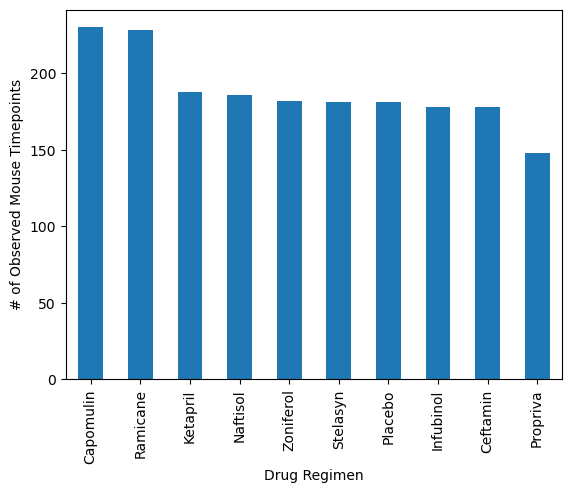

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df["Drug Regimen"].value_counts()
drug_regimen.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

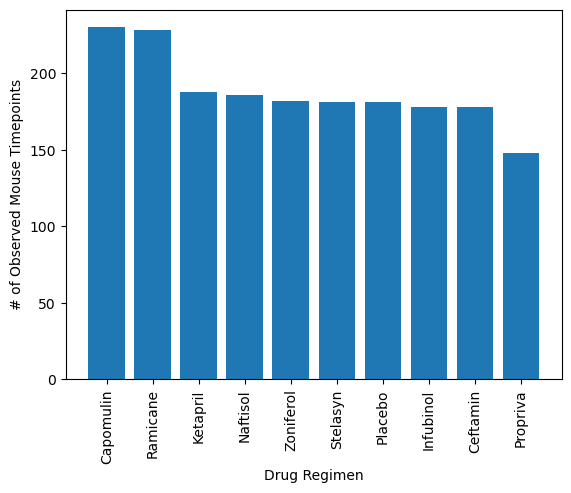

In [118]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen.index.values, drug_regimen)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

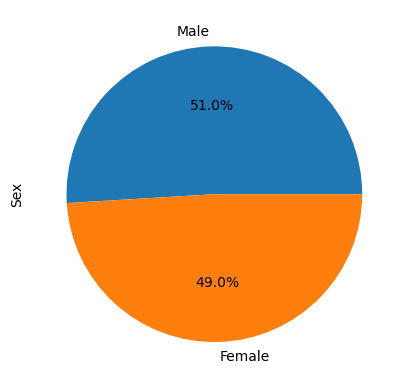

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df["Sex"].value_counts()
mice_sex.plot(kind = "pie",autopct = "%1.1f%%")
plt.show()

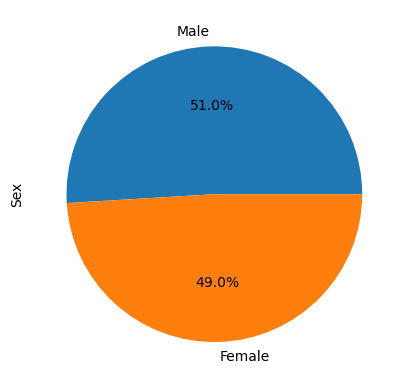

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_sex.values, labels = mice_sex.index.values, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [121]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(clean_df.groupby(["Mouse ID"])["Timepoint"].max())
# greatest_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_greatest = pd.merge(clean_df,greatest_timepoint,how = "right", on = ["Mouse ID","Timepoint"])
merged_greatest.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [122]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drugs in treatment_list:
    final_vol = merged_greatest.loc[merged_greatest["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
#     print(final_vol)
    tumor_vol.append(final_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
      
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"{drugs}'s potential outliters: {outliers}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    

Capomulin's potential outliters: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliters: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliters: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliters: Series([], Name: Tumor Volume (mm3), dtype: float64)


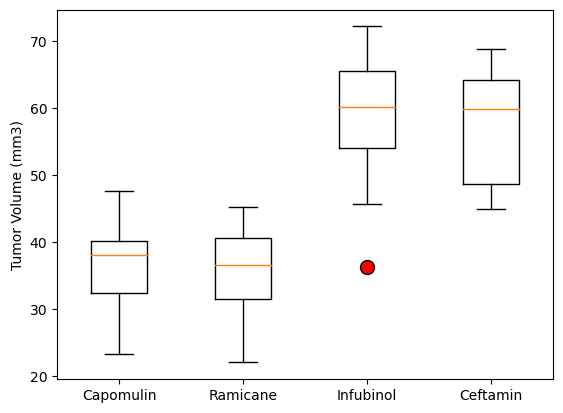

In [123]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol, labels = treatment_list, flierprops={'markerfacecolor':'r','markersize': 10})
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

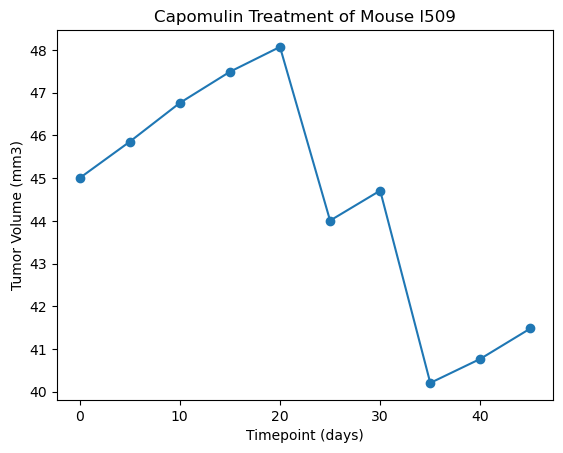

In [124]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & 
                            (clean_df["Mouse ID"] == "l509")]

plt.plot(capomulin_df["Timepoint"], capomulin_df["Tumor Volume (mm3)"], marker="o")

plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

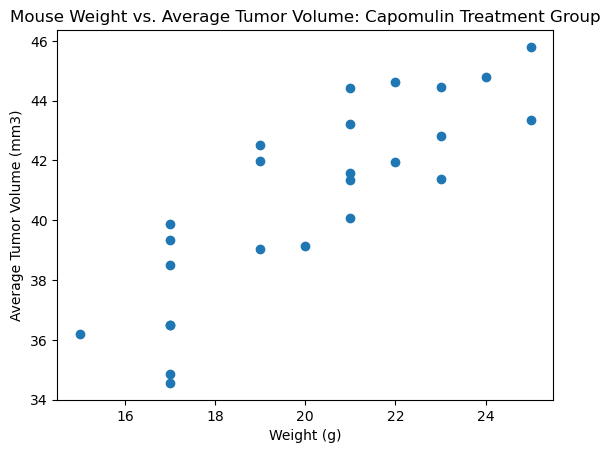

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
                              
tumor_avg = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight_mice = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

x_values = weight_mice
y_values = tumor_avg
plt.scatter(x_values,y_values)

plt.title("Mouse Weight vs. Average Tumor Volume: Capomulin Treatment Group")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()                              

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is 0.71


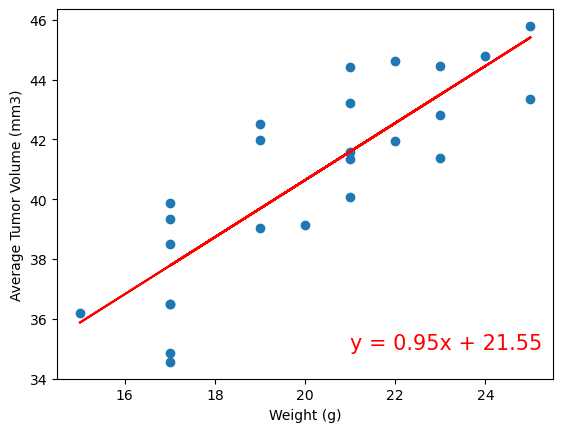

In [107]:
# Calculate the correlation coefficient and a linear regression model 
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight_mice, tumor_avg)[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weight_mice
y_values = tumor_avg

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

r_square = round(rvalue**2,2)
print(f"The r-squared is {r_square}")

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,35),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()